In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

# Create necessary directories

In [ ]:
os.makedirs("../datasets/BRCA_Data/export", exist_ok=True)
os.makedirs("../datasets/BRCA_Data/export_variance_threshold", exist_ok=True)

# Load data

In [3]:
whole_df = pd.read_csv('../datasets/BRCA_Data/brca_data_w_subtypes.csv')
whole_df.dropna(inplace=True)

In [4]:
whole_df.head()

,rs_CLEC3A,rs_CPB1,rs_SCGB2A2,rs_SCGB1D2,rs_TFF1,rs_MUCL1,rs_GSTM1,rs_PIP,rs_ADIPOQ,rs_ADH1B,...,pp_p62.LCK.ligand,pp_p70S6K,pp_p70S6K.pT389,pp_p90RSK,pp_p90RSK.pT359.S363,vital.status,PR.Status,ER.Status,HER2.Final.Status,histological.type
0,0.892818,6.580103,14.123672,10.606501,13.189237,6.649466,10.520335,10.338490,10.248379,10.229970,...,-0.691766,-0.337863,-0.178503,0.011638,-0.207257,0,Positive,Positive,Negative,infiltrating ductal carcinoma
1,0.000000,3.691311,17.116090,15.517231,9.867616,9.691667,8.179522,7.911723,1.289598,1.818891,...,0.279067,0.292925,-0.155242,-0.089365,0.267530,0,Positive,Negative,Negative,infiltrating ductal carcinoma
2,3.748150,4.375255,9.658123,5.326983,12.109539,11.644307,10.517330,5.114925,11.975349,11.911437,...,0.219910,0.308110,-0.190794,-0.222150,-0.198518,0,Positive,Positive,Negative,infiltrating ductal carcinoma
3,0.000000,18.235519,18.535480,14.533584,14.078992,8.913760,10.557465,13.304434,8.205059,9.211476,...,-0.266554,-0.079871,-0.463237,0.522998,-0.046902,0,Positive,Positive,Negative,infiltrating ductal carcinoma
4,0.000000,4.583724,15.711865,12.804521,8.881669,8.430028,12.964607,6.806517,4.294341,5.385714,...,-0.441542,-0.152317,0.511386,-0.096482,0.037473,0,Positive,Positive,Negative,infiltrating ductal carcinoma


# Split dataset into different omics datasets

## Get Copy Number features

In [5]:
cn_features = whole_df.filter(regex='cn')
cn_features.columns = [ str(i).split('_')[-1] for i in cn_features.columns.to_list()]
cn_features

,ISG15,PLCH2,SAMD11,TNFRSF18,BAI2,TEKT2,DNALI1,RSPO1,KIAA0754,KCNQ4,...,MPPED1,SULT4A1,PNPLA3,PHF21B,UPK3A,SMC1B,WNT7B,KLHDC7B,MAPK8IP2,MLC1
0,0,0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,-1,-1,-1,-1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
645,0,0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
647,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
648,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
cn_features.shape

(560, 860)

## Get Mutation features

In [7]:
mu_features = whole_df.filter(regex='mu')
mu_features.columns = [ str(i).split('_')[-1] for i in mu_features.columns.to_list()]
mu_features

,ANK3,GATA3,HECTD4,LRBA,LRP2,SYNE1,CDH1,MGA,MUC16,ZFHX4,...,FBN1,DNAH11,PIWIL1,SCN10A,ATRX,PKHD1L1,MAP1A,DNAH9,MYH7,PEG3
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
645,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
647,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
mu_features.shape

(560, 249)

## Get Gene Expression features

In [9]:
rs_features = whole_df.filter(regex='rs')
rs_features.columns = [ str(i).split('_')[-1] for i in rs_features.columns.to_list()]
rs_features

,CLEC3A,CPB1,SCGB2A2,SCGB1D2,TFF1,MUCL1,GSTM1,PIP,ADIPOQ,ADH1B,...,SELP,PADI3,ACVR1C,AMY1A,OXTR,DEFB132,APOB,SPHKAP,DPYSL5,HEPN1
0,0.892818,6.580103,14.123672,10.606501,13.189237,6.649466,10.520335,10.338490,10.248379,10.229970,...,7.769511,4.618368,5.012278,0.514400,9.080063,5.321376,0.892818,1.651683,0.000000,2.860625
1,0.000000,3.691311,17.116090,15.517231,9.867616,9.691667,8.179522,7.911723,1.289598,1.818891,...,4.735620,1.289598,2.314029,0.000000,5.505313,2.509696,0.444879,3.769803,0.000000,0.000000
2,3.748150,4.375255,9.658123,5.326983,12.109539,11.644307,10.517330,5.114925,11.975349,11.911437,...,7.635876,1.500292,6.805251,1.500292,6.335281,4.296876,3.708331,0.000000,0.000000,4.554828
3,0.000000,18.235519,18.535480,14.533584,14.078992,8.913760,10.557465,13.304434,8.205059,9.211476,...,6.822135,0.488926,4.484248,1.774249,7.223634,0.000000,1.593163,0.853517,0.000000,0.000000
4,0.000000,4.583724,15.711865,12.804521,8.881669,8.430028,12.964607,6.806517,4.294341,5.385714,...,6.468574,1.370053,2.710790,1.575796,6.382129,3.092157,0.000000,0.841893,0.000000,1.755828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0.000000,14.652475,6.430018,2.487152,10.896235,2.487152,1.507262,3.591691,9.853473,8.579071,...,9.392739,0.546660,4.530583,0.546660,7.463650,3.889483,1.252173,2.363451,0.546660,2.287915
645,0.000000,4.071531,3.128508,5.467426,0.000000,0.718438,7.640049,2.959232,0.718438,0.000000,...,3.128508,1.386038,5.559155,12.482838,3.231233,0.000000,0.000000,0.718438,1.386038,0.000000
647,3.186199,11.624534,8.096817,4.858956,9.683010,9.276432,0.000000,4.104681,10.952462,10.785635,...,7.976285,1.749792,5.398675,1.749792,8.285016,4.046919,3.016015,1.597174,0.000000,3.473436
648,15.582967,10.151592,15.638541,14.126165,12.447517,16.541921,2.528146,12.756991,7.870444,7.952345,...,7.478828,0.966209,4.023140,0.000000,5.359451,2.528146,2.815555,0.398241,0.000000,1.683696


In [10]:
rs_features.shape

(560, 604)

## Get Protein levels

In [11]:
pp_features = whole_df.filter(regex='pp')
pp_features.columns = [ str(i).split('_')[-1] for i in pp_features.columns.to_list()]
pp_features

,X14.3.3.beta,X14.3.3.epsilon,X14.3.3.zeta,X4E.BP1,X4E.BP1.pS65,X4E.BP1.pT37.T46,X4E.BP1.pT70,X53BP1,A.Raf,A.Raf.pS299,...,p27.pT157,p27.pT198,p38.MAPK,p38.pT180.Y182,p53,p62.LCK.ligand,p70S6K,p70S6K.pT389,p90RSK,p90RSK.pT359.S363
0,-0.065365,-0.173698,-0.190752,0.390807,0.035643,0.193454,-0.170579,0.283253,0.023943,-0.220959,...,-0.027042,-0.043330,-0.002598,0.449228,-0.375230,-0.691766,-0.337863,-0.178503,0.011638,-0.207257
1,-0.029615,-0.157523,-0.283581,0.022243,-0.092125,-0.056990,0.245442,-0.172924,-0.158133,0.273483,...,-0.071406,-0.220764,0.220809,1.035115,-0.074136,0.279067,0.292925,-0.155242,-0.089365,0.267530
2,0.140563,0.192701,0.211418,0.134013,-0.233483,-1.092607,-0.287758,-0.290589,-0.114879,-0.216302,...,0.001280,0.010615,-0.133214,0.344969,-0.351936,0.219910,0.308110,-0.190794,-0.222150,-0.198518
3,-0.008031,-0.138642,-0.122891,-0.032011,-0.025761,-0.455216,-0.144672,0.500917,-0.305537,-0.164504,...,-0.024496,0.064070,-0.384008,0.678042,0.096329,-0.266554,-0.079871,-0.463237,0.522998,-0.046902
4,0.029802,0.053255,0.312539,0.702953,-0.026729,0.638111,0.064882,-0.488972,-0.079593,0.320487,...,-0.081189,-0.065488,0.209858,0.920408,0.042210,-0.441542,-0.152317,0.511386,-0.096482,0.037473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0.381456,0.522120,1.529361,1.717791,0.750555,1.934549,1.370733,-0.583353,0.382891,-0.172099,...,-0.132227,-0.062831,-0.287325,0.298619,0.059953,0.143937,-0.187309,-0.005034,-0.511851,0.010582
645,0.275674,0.224690,0.266996,0.225552,0.252908,0.540129,0.487863,0.450666,0.271884,0.124829,...,0.079551,0.086937,-0.048535,-0.616861,0.448693,0.866684,-0.362491,-0.225097,-0.098282,-0.057920
647,-0.117460,0.562917,-0.252417,0.404641,-0.058387,-0.527563,-0.546805,-0.930787,-0.082866,-0.232981,...,-0.038390,-0.144020,0.353287,0.734761,-0.671665,-0.506134,-0.369786,0.967447,-0.201545,0.482839
648,-0.254129,-0.119350,-0.397030,-0.320433,-0.168985,-0.359294,0.041617,0.389188,-0.094756,-0.603062,...,-0.005723,0.024374,0.025235,0.935080,-0.194635,0.720128,-0.208679,0.003550,-0.254628,-0.092632


In [12]:
pp_features.shape

(560, 223)

# Remove low variance features

In [13]:
def select_feature_above_variance(data:pd.DataFrame, variance_threshold=1) -> list:
    accept = []
    for c in data.columns:
        c_var = data[c].var()
        if c_var < variance_threshold:
            #print(f"{c} - {c_var}<{variance_threshold}")
            continue
        else:
            accept.append(c)
    return accept

## Copy number data

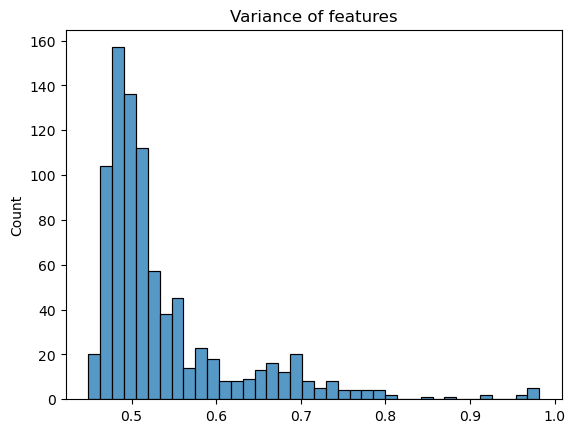

In [14]:
cn_var = cn_features.var()
fig, ax = plt.subplots()
sns.histplot(cn_var, ax=ax)
_= ax.set_title("Variance of features")

In [15]:
print(f"Shape before feature selection: {cn_features.shape}")

cn_selected_features = select_feature_above_variance(cn_features, 0.5)
cn_fs = cn_features[cn_selected_features]

print(f"Shape after feature selection: {cn_fs.shape}")


Shape before feature selection: (560, 860)
Shape after feature selection: (560, 485)


## Mutation

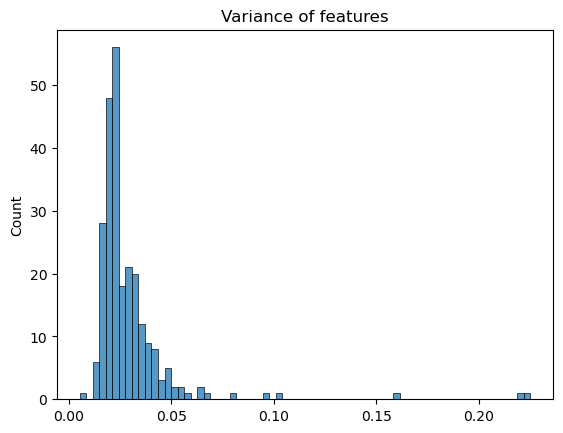

In [16]:
mu_var = mu_features.var()
fig, ax = plt.subplots()
sns.histplot(mu_var, ax=ax)
_= ax.set_title("Variance of features")

In [17]:
print(f"Shape before feature selection: {mu_features.shape}")

mu_selected_features = select_feature_above_variance(mu_features, 0.04)
mu_fs = mu_features[mu_selected_features]

print(f"Shape after feature selection: {mu_fs.shape}")

Shape before feature selection: (560, 249)
Shape after feature selection: (560, 30)


In [18]:
for c in mu_fs:
    print(f"{c}: unique values: {mu_fs[c].unique()}")

GATA3: unique values: [0 1]
SYNE1: unique values: [0 1]
CDH1: unique values: [0 1]
MUC16: unique values: [1 0]
MLL3: unique values: [1 0]
MUC5B: unique values: [1 0]
MAP3K1: unique values: [0 1]
CSMD1: unique values: [0 1]
DMD: unique values: [0 1]
MUC12: unique values: [0 1]
RYR2: unique values: [0 1]
USH2A: unique values: [0 1]
PIK3CA: unique values: [0 1]
TP53: unique values: [0 1]
SPEN: unique values: [0 1]
MUC4: unique values: [0 1]
OBSCN: unique values: [0 1]
HRNR: unique values: [0 1]
CROCCP2: unique values: [0 1]
TTN: unique values: [0 1]
NEB: unique values: [0 1]
MACF1: unique values: [0 1]
APOB: unique values: [0 1]
FLG: unique values: [0 1]
GPR98: unique values: [0 1]
TBP: unique values: [0 1]
RYR3: unique values: [0 1]
RYR1: unique values: [0 1]
SYNE2: unique values: [0 1]
HMCN1: unique values: [0 1]


## Gene expression

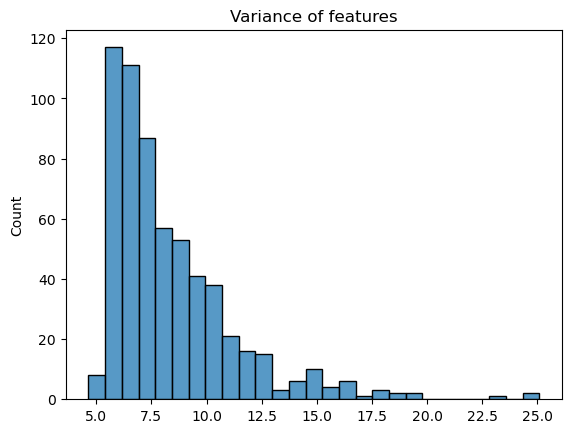

In [19]:
rs_var = rs_features.var()
fig, ax = plt.subplots()
sns.histplot(rs_var, ax=ax)
_= ax.set_title("Variance of features")

In [20]:
print(f"Shape before feature selection: {rs_features.shape}")

rs_selected_features = select_feature_above_variance(rs_features, 7.5)
rs_fs = rs_features[rs_selected_features]

print(f"Shape after feature selection: {rs_fs.shape}")

Shape before feature selection: (560, 604)
Shape after feature selection: (560, 296)


## Protein levels

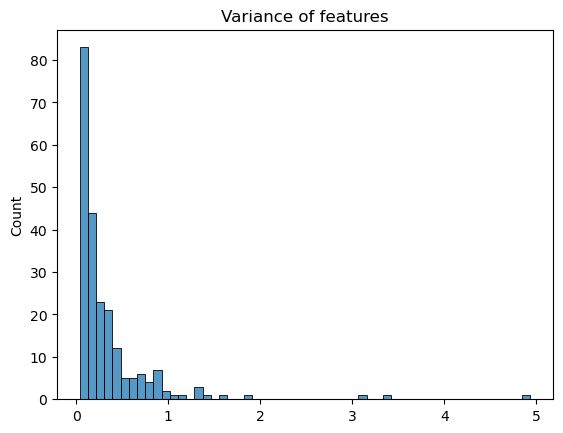

In [21]:
pp_var = pp_features.var()
fig, ax = plt.subplots()
sns.histplot(pp_var, ax=ax)
_= ax.set_title("Variance of features")

In [22]:
print(f"Shape before feature selection: {pp_features.shape}")

pp_selected_features = select_feature_above_variance(pp_features, 0.25)
pp_fs = pp_features[pp_selected_features]

print(f"Shape after feature selection: {pp_fs.shape}")

Shape before feature selection: (560, 223)
Shape after feature selection: (560, 81)


# Get additional/target information

In [23]:
additional_features = whole_df.filter(regex='status|Status|type')
additional_features

,vital.status,PR.Status,ER.Status,HER2.Final.Status,histological.type
0,0,Positive,Positive,Negative,infiltrating ductal carcinoma
1,0,Positive,Negative,Negative,infiltrating ductal carcinoma
2,0,Positive,Positive,Negative,infiltrating ductal carcinoma
3,0,Positive,Positive,Negative,infiltrating ductal carcinoma
4,0,Positive,Positive,Negative,infiltrating ductal carcinoma
...,...,...,...,...,...
644,0,Positive,Positive,Negative,infiltrating ductal carcinoma
645,0,Negative,Negative,Negative,infiltrating ductal carcinoma
647,0,Positive,Positive,Positive,infiltrating ductal carcinoma
648,0,Positive,Positive,Negative,infiltrating ductal carcinoma


In [24]:
for c in additional_features.columns:
    print(additional_features[c].value_counts())
    print(additional_features[c].unique())
    print(f"Null values: {additional_features[c].isnull().sum()}")
    print("\n")


vital.status
0    487
1     73
Name: count, dtype: int64
[0 1]
Null values: 0


PR.Status
Positive                       342
Negative                       184
Not Performed                   28
Indeterminate                    4
Performed but Not Available      2
Name: count, dtype: int64
['Positive' 'Negative' 'Performed but Not Available' 'Indeterminate'
 'Not Performed']
Null values: 0


ER.Status
Positive                       401
Negative                       128
Not Performed                   27
Performed but Not Available      2
Indeterminate                    2
Name: count, dtype: int64
['Positive' 'Negative' 'Performed but Not Available' 'Indeterminate'
 'Not Performed']
Null values: 0


HER2.Final.Status
Negative         457
Positive          86
Equivocal          9
Not Available      8
Name: count, dtype: int64
['Negative' 'Positive' 'Equivocal' 'Not Available']
Null values: 0


histological.type
infiltrating ductal carcinoma     509
infiltrating lobular carcinoma     51

In [25]:
additional_features.shape

(560, 5)

# Export omics data individually

In [26]:
rs_features.to_csv("./BRCA_Data/export/gene_expression.csv")
rs_fs.to_csv("./BRCA_Data/export_variance_threshold/gene_expression.csv")

mu_features.to_csv("./BRCA_Data/export/mutation.csv")
mu_fs.to_csv("./BRCA_Data/export_variance_threshold/mutation.csv")

cn_features.to_csv("./BRCA_Data/export/copy_number.csv")
cn_fs.to_csv("./BRCA_Data/export_variance_threshold/copy_number.csv")

pp_features.to_csv("./BRCA_Data/export/protein_levels.csv")
pp_fs.to_csv("./BRCA_Data/export_variance_threshold/protein_levels.csv")

additional_features.to_csv("./BRCA_Data/export/additional_info.csv")
additional_features.to_csv("./BRCA_Data/export_variance_threshold/additional_info.csv")

OSError: Cannot save file into a non-existent directory: 'BRCA_Data\export'